**Vamos experimentar agora o algoritmo Decision Tree?**

In [7]:
!pip -q install yellowbrick
!pip install --upgrade sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('../Dados/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [10]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [11]:
previsoes = modelo.predict(X_teste)

In [12]:
previsoes

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [13]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.770949720670391

In [15]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[82, 23],
       [18, 56]])

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.770949720670391

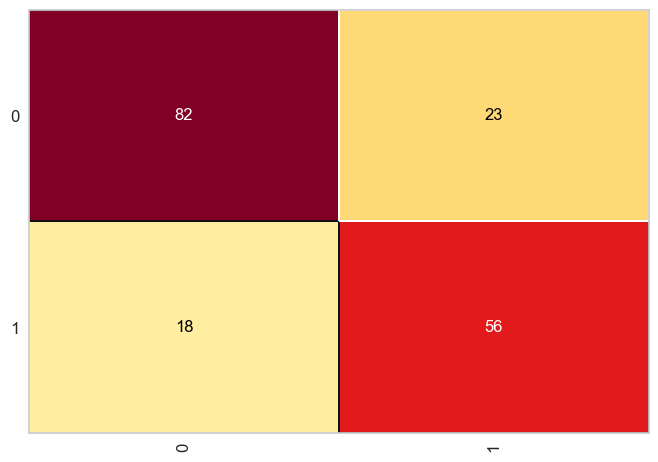

In [16]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [17]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



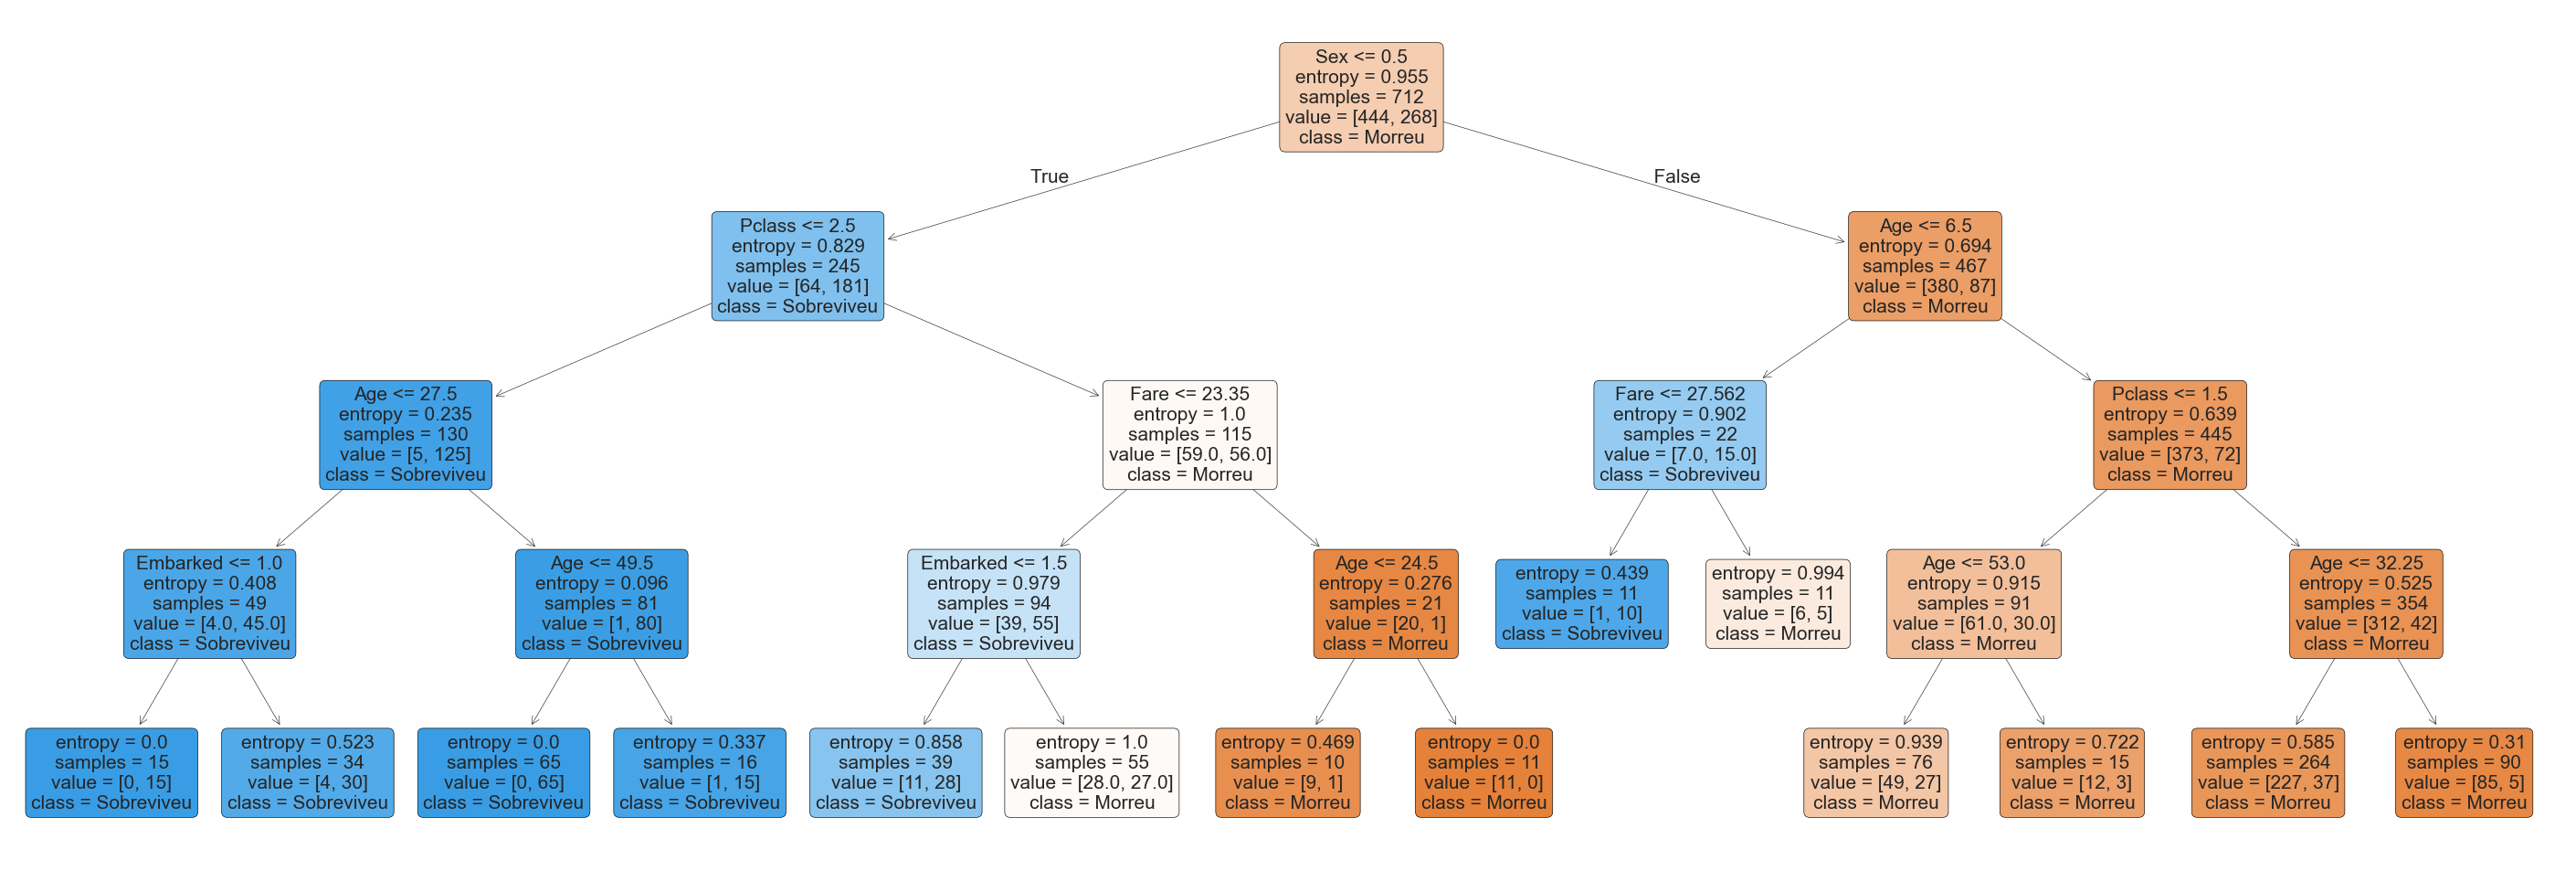

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 27.50
|   |   |   |--- Embarked <= 1.00
|   |   |   |   |--- class: 1
|   |   |   |--- Embarked >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Age >  27.50
|   |   |   |--- Age <= 49.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  49.50
|   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Embarked <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Embarked >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Fare >  23.35
|   |   |   |--- Age <= 24.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  24.50
|   |   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Age <= 6.50
|   |   |--- Fare <= 27.56
|   |   |   |--- class: 1
|   |   |--- Fare >  27.56
|   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  53.00
|   |   |   |   |--- class: 0
|   |   |--- Pclass 

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# treina a árvore com limite de profundidade
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)
modelo.fit(X_treino, y_treino)

# desenha a árvore
plt.figure(figsize=(24,8), dpi=150)
plot_tree(
    modelo,
    feature_names=X_treino.columns,
    class_names=['Morreu','Sobreviveu'],
    filled=True, rounded=True, fontsize=10
)
plt.show()

# mostra as regras em texto (opcional)
print(export_text(modelo, feature_names=list(X_treino.columns), max_depth=4))
